# ANUSHA S
# PGAA- 01 Online
# DL EXAM 2
# PART 1

# Problem Statement
A company named ‘XYZ’ sells a variety of health products for people of all ages. Company
management has decided to make key decisions on their logistics, supply and production for which
they want to check the sales figures for a certain set of years which will help them to invest their
bucks and time in taking decisions on key factors.
# GOAL
: As a Deep Learning Engineer in the company, you are given historical data with respect to
multiple regions of India and years (2005 to 2016). Your goal is to forecast sales for the years
2017 and 2018.
# DATA DESCRIPTION
Historical sales data of XYZ company from 2005 to 2016. Attribute
Information:
1. HQ - This attribute represents HeadQuarters of the company.
2. Country - This attribute represents the country of the outlet.
3. State_of_outlet - This attribute represents the state of the outlet.
4. City_of_outlet - This attribute represents the city of the outlet.
5. Month - This attribute represents month(ranging from 1 to 12 )
6. Day - This attribute represents day of the month(ranging from 1 to 31)
7. Year - This attribute represents year(ranging from 2005 to 2016)
8. Total_Sales - Target variable (total sales on particular day). This is basically the sale index
value. For eg: if value is 60 then you can assume total sale happened is 60*10,000 USD.


Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.metrics import accuracy_score
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Embedding,SpatialDropout1D
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Reading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_excel("/content/drive/MyDrive/Imarticus Projects/EXAMS/DL EXAM 2/Datasets/LSTM/Sales Forecasting_Train Data.xlsx")
df.head()

Mounted at /content/drive


,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales
0,Asia,India,NaN,Bombay (Mumbai),1.0,1.0,2005.0,72.2
1,Asia,India,NaN,Bombay (Mumbai),1.0,2.0,2005.0,72.7
2,Asia,India,NaN,Bombay (Mumbai),1.0,3.0,2005.0,74.3
3,Asia,India,NaN,Bombay (Mumbai),1.0,4.0,2005.0,78.9
4,Asia,India,NaN,Bombay (Mumbai),1.0,5.0,2005.0,81.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HQ               17536 non-null  object 
 1   Country          17536 non-null  object 
 2   State_of_outlet  0 non-null      float64
 3   City_of_outlet   17536 non-null  object 
 4   Month            17536 non-null  float64
 5   Day              17536 non-null  float64
 6   Year             17536 non-null  float64
 7   Total_Sales      17536 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


In [ ]:
df.shape

(17536, 8)

It is found that there is no data in State-of- Outlet column hence drop it

In [ ]:
date=pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.Day))

In [ ]:
df['date']=date
df.head()

,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales,date
0,Asia,India,NaN,Bombay (Mumbai),1.0,1.0,2005.0,72.2,2005-01-01
1,Asia,India,NaN,Bombay (Mumbai),1.0,2.0,2005.0,72.7,2005-01-02
2,Asia,India,NaN,Bombay (Mumbai),1.0,3.0,2005.0,74.3,2005-01-03
3,Asia,India,NaN,Bombay (Mumbai),1.0,4.0,2005.0,78.9,2005-01-04
4,Asia,India,NaN,Bombay (Mumbai),1.0,5.0,2005.0,81.5,2005-01-05


In [ ]:
df= df.drop(['Month'],axis=1)
df=df.drop(['Year'],axis=1)
df=df.drop(['Day'],axis=1)
df=df.drop(['State_of_outlet'], axis = 1)
df.head()

,HQ,Country,City_of_outlet,Total_Sales,date
0,Asia,India,Bombay (Mumbai),72.2,2005-01-01
1,Asia,India,Bombay (Mumbai),72.7,2005-01-02
2,Asia,India,Bombay (Mumbai),74.3,2005-01-03
3,Asia,India,Bombay (Mumbai),78.9,2005-01-04
4,Asia,India,Bombay (Mumbai),81.5,2005-01-05


In [ ]:
df.describe()

,Total_Sales
count,17536.000000
mean,80.117963
std,13.315486
min,-99.000000
25%,77.500000
50%,82.600000
75%,86.100000
max,102.500000


In [ ]:
df.describe(include=object)

,HQ,Country,City_of_outlet
count,17536,17536,17536
unique,1,1,4
top,Asia,India,Bombay (Mumbai)
freq,17536,17536,4384


In [ ]:
df.City_of_outlet.unique()

array(['Bombay (Mumbai)', 'Calcutta', 'Chennai (Madras)', 'Delhi'],
      dtype=object)

It is found that the dataset is all about sales of XYZ product in India only at 4 differnt cities- Mumbai, Calcutta, Chennai and Delhi

In [ ]:
df=df.drop(['HQ'],axis=1)
df=df.drop(['Country'], axis=1)
df.head()

,City_of_outlet,Total_Sales,date
0,Bombay (Mumbai),72.2,2005-01-01
1,Bombay (Mumbai),72.7,2005-01-02
2,Bombay (Mumbai),74.3,2005-01-03
3,Bombay (Mumbai),78.9,2005-01-04
4,Bombay (Mumbai),81.5,2005-01-05


In [ ]:
# label encode City_of_outlet
df= df.replace(to_replace =['Bombay (Mumbai)', 'Calcutta', 'Chennai (Madras)', 'Delhi'], 
                            value =['1','2','3','4'])

In [ ]:
df.head()

,City_of_outlet,Total_Sales,date
0,1,72.2,2005-01-01
1,1,72.7,2005-01-02
2,1,74.3,2005-01-03
3,1,78.9,2005-01-04
4,1,81.5,2005-01-05


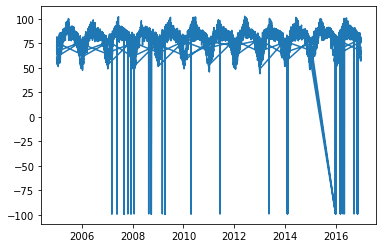

In [ ]:
plt.plot(df.date, df.Total_Sales)

In [ ]:
Total_Sales=df.filter(['Total_Sales'])

In [ ]:
Total_Sales.head()

,Total_Sales
0,72.2
1,72.7
2,74.3
3,78.9
4,81.5


In [ ]:
Sales=Total_Sales.values

In [ ]:
Sales

array([[72.2],
       [72.7],
       [74.3],
       ...,
       [59.3],
       [57.1],
       [58.3]])

# Presparing and scaling training data

In [ ]:
import math
training_data_length = math.ceil(len(Sales)*0.8)

In [ ]:
training_data_length

14029

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0, 1))

In [ ]:
scaled_sales=mms.fit_transform(Sales)

In [ ]:
training_data=scaled_sales[0:training_data_length,:]

In [ ]:
training_data

array([[0.84962779],
       [0.85210918],
       [0.86004963],
       ...,
       [0.93449132],
       [0.94094293],
       [0.94491315]])

Making x_train and y_train

In [ ]:
X_train=[]
y_train=[]

In [ ]:
for i in range(60 ,len(training_data)):
    X_train.append(training_data[i-60:i,0])
    y_train.append(training_data[i,0])

In [ ]:
X_train[0]

array([0.84962779, 0.85210918, 0.86004963, 0.88287841, 0.89578164,
       0.88238213, 0.87493797, 0.88486352, 0.88238213, 0.87146402,
       0.8719603 , 0.8719603 , 0.88238213, 0.86898263, 0.87394541,
       0.86600496, 0.86253102, 0.84466501, 0.84913151, 0.87245658,
       0.87841191, 0.8630273 , 0.8516129 , 0.8560794 , 0.85657568,
       0.85260546, 0.8674938 , 0.86848635, 0.86799007, 0.86699752,
       0.87047146, 0.87940447, 0.88635236, 0.88933002, 0.89627792,
       0.89330025, 0.88883375, 0.89131514, 0.89627792, 0.90719603,
       0.89975186, 0.89032258, 0.90173697, 0.9146402 , 0.90719603,
       0.89379653, 0.89478908, 0.88337469, 0.87493797, 0.86799007,
       0.8516129 , 0.87493797, 0.87543424, 0.86451613, 0.87741935,
       0.8942928 , 0.91612903, 0.90322581, 0.88635236, 0.88784119])

In [ ]:
y_train[0]

0.8843672456575682

changing x_train and y_train to numpy arrays

In [ ]:
X_train,y_train=np.array(X_train),np.array(y_train)

In [ ]:
X_train.shape, y_train.shape

((13969, 60), (13969,))

In [ ]:
print(X_train.ndim)
print(X_train.shape)

2
(13969, 60)


In [ ]:
print(X_train.shape)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)

(13969, 60)
(13969, 60, 1)


Build LSTM Model

In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))


# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))


# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))


# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))

In [ ]:
# Adding the output layer
model.add(Dense(units = 1)) #No activation function for output neuron as it's a regression problem

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_absolute_error')

In [36]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
437/437 [==============================] - 38s 61ms/step - loss: 0.0404
Epoch 2/50
437/437 [==============================] - 26s 60ms/step - loss: 0.0250
Epoch 3/50
437/437 [==============================] - 26s 60ms/step - loss: 0.0215
Epoch 4/50
437/437 [==============================] - 26s 60ms/step - loss: 0.0219
Epoch 5/50
437/437 [==============================] - 27s 61ms/step - loss: 0.0195
Epoch 6/50
437/437 [==============================] - 27s 61ms/step - loss: 0.0175
Epoch 7/50
437/437 [==============================] - 27s 61ms/step - loss: 0.0158
Epoch 8/50
437/437 [==============================] - 27s 61ms/step - loss: 0.0137
Epoch 9/50
437/437 [==============================] - 27s 61ms/step - loss: 0.0144
Epoch 10/50
437/437 [==============================] - 27s 61ms/step - loss: 0.0130
Epoch 11/50
437/437 [==============================] - 27s 61ms/step - loss: 0.0131
Epoch 12/50
437/437 [==============================] - 27s 61ms/step - loss: 0.0135
E

Prepare and reshape test data

In [44]:
test_data=scaled_sales[training_data_length-60:,:]

In [45]:
X_test=[]
y_test=Sales[training_data_length:,:]

In [46]:
for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [47]:
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

Make predictions

In [48]:
y_pred=model.predict(X_test)
y_pred=mms.inverse_transform(y_pred)
pd.DataFrame(y_pred)

,0
0,90.426788
1,90.058601
2,86.941536
3,87.700653
4,89.689285
...,...
3502,61.621635
3503,61.862598
3504,62.122284
3505,59.988411


Plot the data

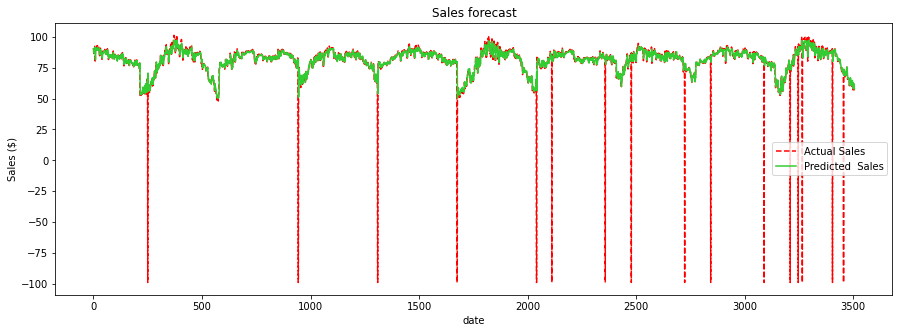

In [49]:
# Visualising the results
plt.figure(figsize=(15,5))
plt.plot(y_test, color = 'red', label = 'Actual Sales',ls='--')
plt.plot(y_pred, color = 'limegreen', label = 'Predicted  Sales',ls='-')
plt.title('Sales forecast')
plt.xlabel('date')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()

In [50]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import meanabs 
y_pred = np.reshape(y_pred, (y_pred.shape[0], y_pred.shape[1], 1))
err_LSTM = meanabs(X_test, y_pred)
print('MAE with LSTM', err_LSTM)

MAE with LSTM [[80.35551182]
 [80.35552965]
 [80.35554324]
 [80.3555581 ]
 [80.35557762]
 [80.35559885]
 [80.35561696]
 [80.35563805]
 [80.35566239]
 [80.35568447]
 [80.35594966]
 [80.3559706 ]
 [80.35598914]
 [80.35600923]
 [80.3560323 ]
 [80.35605579]
 [80.35608041]
 [80.35610617]
 [80.35613136]
 [80.35615357]
 [80.35617409]
 [80.35619504]
 [80.35621796]
 [80.35624414]
 [80.35626438]
 [80.35628277]
 [80.356304  ]
 [80.35632848]
 [80.35635975]
 [80.35639004]
 [80.35642159]
 [80.35645358]
 [80.35648329]
 [80.35651273]
 [80.35653777]
 [80.35656608]
 [80.35659353]
 [80.35662636]
 [80.35665678]
 [80.35669641]
 [80.35672825]
 [80.35676164]
 [80.35679575]
 [80.35683325]
 [80.35687471]
 [80.35691999]
 [80.35695919]
 [80.35699896]
 [80.35703731]
 [80.35707184]
 [80.35711004]
 [80.35715236]
 [80.35719665]
 [80.35723726]
 [80.35728481]
 [80.35732415]
 [80.35736462]
 [80.3574024 ]
 [80.35744486]
 [80.35749226]]


# RESULT
Obtained Mean Absolute error is 80.35